In [15]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
import csv
import pandas as pd
import sys
import csv
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

# Open the CSV file and read its contents
with open('train.csv', 'r', encoding='utf-8', errors='ignore') as csvfile:
    # Create a CSV reader object and set its dialect
    reader = csv.reader(csvfile, dialect='excel')

    # Initialize an empty list to store the rows
    rows = []

    # Loop through each row in the CSV file
    for row in reader:
        # Append the row to the list of rows
        rows.append(row)

# Convert the list of rows to a Pandas DataFrame
df = pd.DataFrame(rows[1:], columns=rows[0])


In [29]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [30]:
df.shape

(19032, 5)

In [31]:
# looking and replacing null datas
df.isnull().sum()
df = df.fillna('')

In [32]:
df['content']=df['title']+" "+['author']

In [33]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired author
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


0    9537
1    9494
        1
Name: label, dtype: int64



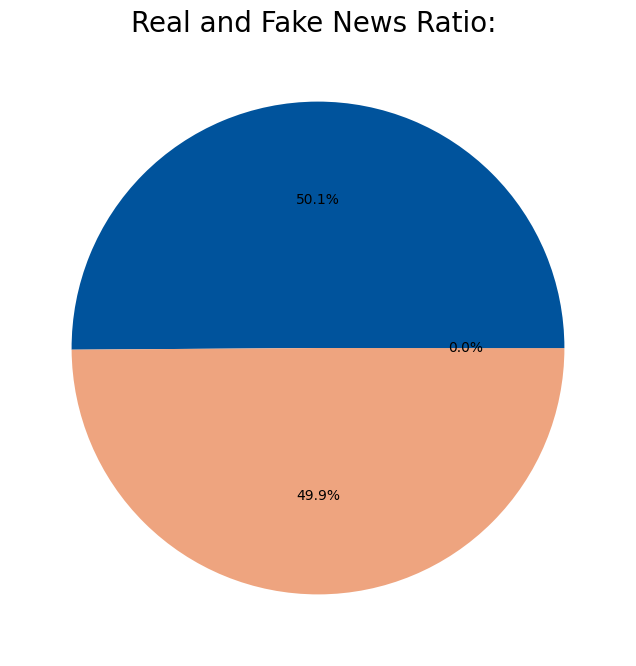

In [35]:
# Real and fake news ratio :
import matplotlib.pyplot as plt
print(df['label'].value_counts())
print()
plt.figure(figsize=[10,8])
plt.pie(df.label.value_counts(),autopct='%1.1f%%',colors=['#00539C','#EEA47F'])
plt.title("Real and Fake News Ratio: ",fontsize=20)
plt.show()

In [36]:
x = df['content']
x.shape

(19032,)

In [37]:
y = df['label']
y.shape

(19032,)

In [38]:
# from nltk.stem.porter import PorterStemmer ##stemming purpose
# ps = PorterStemmer()
# review = re.sub('[^a-zA-Z]',' ', df.content)
# review = review.lower()
# review = review.split() 
# review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
# review = ' '.join(review)
# return review

In [39]:
# convert all letters to lowerscase:
df['content']=df['content'].apply(lambda x :x.lower())
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide: we didn’t even see comey’s let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"flynn: hillary clinton, big woman on campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why the truth might get you fired author
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed for fictional unpublished...


In [121]:
# # removing punctuations:
# import string 
# def punctaution_remove(text):
#   list=[char for char in text if char not in string.punctuation]
#   clean=''.join(list)
#   return clean

# df['content']=df['content'].apply(punctaution_remove)
# df.head()

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    return text

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the cleaning and preprocessing to the dataset
df['content'] = df['content'].apply(clean_text)
df['content'] = df['content'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [122]:
# # remove stop words:
# from nltk.corpus import stopwords
# stop=stopwords.words('english')
# df['content']=df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [123]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,hous dem aid didnt even see comey letter jason...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillari clinton big woman campu breitbar...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,truth might get fire author
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,civilian kill singl us airstrik identifi author
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jail fiction unpublish stori wom...


In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [126]:
# converting textual data into numerical data:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(stop_words='english',max_df=0.4,lowercase=True)
xtrain=vectorizer.fit_transform(X_train)
xtest=vectorizer.transform(X_test)

In [127]:
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [128]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [129]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier=PassiveAggressiveClassifier(max_iter=30)
classifier.fit(xtrain,y_train)

PassiveAggressiveClassifier(max_iter=30)

Confusion matrix, without normalization


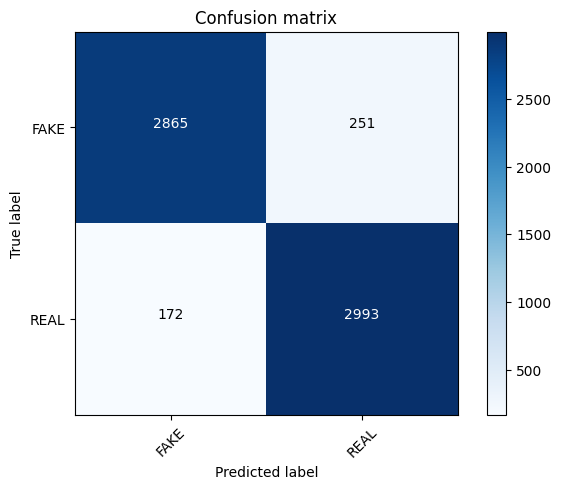

In [130]:
import itertools
y_pred=classifier.predict(xtest)
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3037
           1       0.95      0.92      0.93      3244

    accuracy                           0.93      6281
   macro avg       0.93      0.93      0.93      6281
weighted avg       0.93      0.93      0.93      6281



In [132]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,y_train)

LogisticRegression()

In [133]:
ypred=lr.predict(xtest)

In [134]:
# accurcy of the model:-
score= accuracy_score(y_test,ypred)
print(f"Accuracy: {round(score*100,2)}%")

Accuracy: 93.62%


In [135]:
from sklearn.naive_bayes import GaussianNB
xtrain=xtrain.toarray()
nb=GaussianNB()
nb.fit(xtrain,y_train)

GaussianNB()

In [136]:
# accurcy of the model:-
xtest=xtest.toarray()
ypred1=nb.predict(xtest)
score= accuracy_score(y_test,ypred1)
print(f"Accuracy: {round(score*100,2)}%")

Accuracy: 64.58%


In [137]:
# saving the model
import pickle
final_model=pickle.dump(lr,open('model.pkl','wb'))

In [138]:
# load the model:
load_model=pickle.load(open('model.pkl','rb'))

In [139]:
# # from numpy.lib.function_base import vectorize
# # predictive system:
# #vectorizer = TfidfVectorizer()
# def fake_news_predict(news):
#   # if isinstance(news, str):
#   #       # Convert the input to lowercase
#   #       news = news.lower()
#   #       # Use the lowercase text to make a prediction
#   #       ...
#   # else:
#   #       print("Error: input must be a string")
#   input=[['news']]
 
#   vectorizer_input=vectorizer.fit_transform(input)
#   prediction=load_model.predict(vectorizer_input)
#   print(prediction)
#   if (prediction==0):
#     print("The News is Real")
#   else:
#     print("The News is Fake")


In [146]:
def predict_fake_news(news_text):
    news_text = (news_text)
    news_text = preprocess_text(news_text)
    news_text_vec = vectorizer.transform([news_text])
    with open('model.pkl', 'rb') as f:
      model = pickle.load(f)
    prediction = model.predict(news_text_vec)[0]
    if prediction == 0:
        print("The news is real.")
    else:
        print("The news is fake.")


In [149]:
predict_fake_news('Excerpts From a Draft Script for Donald Trump’s Q&ampA With a Black Church’s Pastor - The New York Times')

The news is fake.
